# Task 3

# Imports

In [1]:
import json
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import defaultdict

plt.style.use('ggplot')
plt.rcParams.update(
    {'font.size': 16,
     'axes.labelweight': 'bold',
     'figure.figsize': (8, 6)}
)

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
# Step 1: Read CSV file from S3 bucket
df = pd.read_csv(
    "https://mds-s3-15.s3.us-west-2.amazonaws.com/output/ml_data_SYD.csv",
    index_col=0,
    parse_dates=True)

print(df.shape)

(46020, 26)


In [3]:
# Step 2: Drop rows with nans
df = df.dropna()
print(df.shape)

(45989, 26)


In [4]:
# Step 3: Split data
target_column = "observed_rainfall"
df = df.rename(columns={target_column: "Observed"})
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [5]:
# Step 4: EDA
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


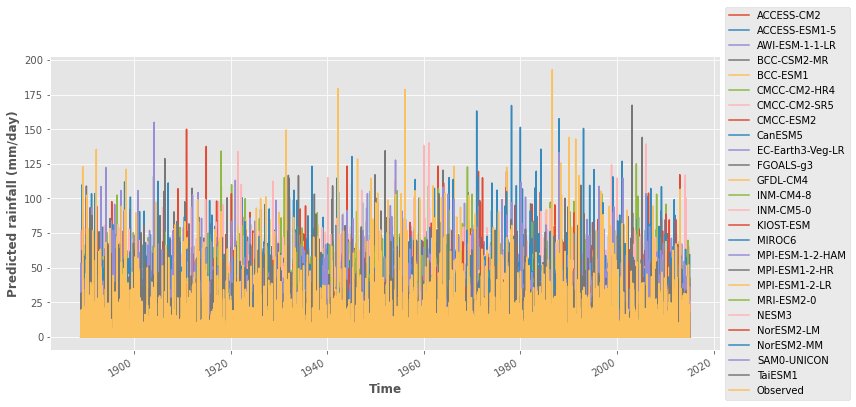

In [6]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)
ax = train_df.plot(kind='line')
ax.legend(ax.get_lines(), train_df.columns,
          loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Time")
ax.set_ylabel("Predicted rainfall (mm/day)")
plt.show()

In [7]:
# Step 5: Train model
X_train = train_df.drop(columns=["Observed"])
y_train = train_df["Observed"]

X_test = test_df.drop(columns=["Observed"])
y_test = test_df["Observed"]

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
y_hat = model.predict(X_test)

In [10]:
results = {}
results["Model"] = ["Ensemble"]
results["RMSE"] = [mean_squared_error(y_test, y_hat, squared=False)]

pd.DataFrame(results).set_index("Model")

,RMSE
Model,
Ensemble,8.822494


In [11]:
# Step 6: Discuss results

for col in X_test.columns:
    results["Model"].append(col)
    results["RMSE"].append(mean_squared_error(y_test, X_test[col], squared=False))

results_df = pd.DataFrame(results).set_index("Model").sort_values("RMSE")
results_df

,RMSE
Model,
Ensemble,8.822494
KIOST-ESM,9.600480
FGOALS-g3,9.687788
MRI-ESM2-0,9.922795
MPI-ESM1-2-HR,9.969823
NESM3,9.978137
MPI-ESM1-2-LR,10.260886
NorESM2-LM,10.410145
EC-Earth3-Veg-LR,10.453606


> **Answer:** The RMSE of all the models to the test set are sorted in ascending order and we see that the RMSE of the ensemble model is lowest which suggests that the ensemble model performs better than any of the individual climate models.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [12]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [13]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.89
 Test RMSE: 8.64


In [14]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***